# 필터

> 이미지 데이터: 순서, 위치 정보가 중요
- 데이터를 표현하는 방법에 문제가 있기 때문에
- 수학: 모든 변수는 독립변수라고 가정.
- 이미지: 주변의 변수가 독립 아니기 때문에, 위치 정보가 중요하기 때문에
- 순서가 중요하므로, 순서를 바꾸거나 무시하면 안됨


> 주변 정보를 고려한 데이터 포현
- 1차원 신호: 음성(점만 보면 같은 점일 수 있으나, 주변의 픽셀과 보면 다른 점으로 판단할 수 있음.
- 2차원 신호: 이미지


# 1. 공간정보 인코딩
- 주변의 특징 정보를 추가해 데이터의 특징 차원을 늘림
-

> 1차원 영상 인코딩
- 3차원: (1, 3) 
- 9차원: 양 옆에 있는 픽셀을 고려하면 (1, 5)가 되고, 이를 3개씩 중첩해서 뽑기
-> 9차원가능(주변 정보를 하나씩 추가해서 위치까지 고려)

> 2차원 영상 인코딩
- 3*3차원 -> 81차원(주변 정보들을 모두 입력으로 각각 넣기)
- 차원이 발생하면 overfitting 발생 -> 전이학습으로 해결가능
- 128*128차원이라면 16384 * 9 = 147456차원
- 주변값을 모두 계산하려고 하면 너무 차원이 커지고, 연산량이 늘어나니까

### 해결1: 대표값을 사용하는 인코딩방법
> 효과적인 인코딩방법1 : 대표값: 평균을 사용 (주변값 9개 평균)
- 차원이 너무 늘어나니까...좀 줄여보자 -> 주변값과의 평균으로 구하자
- 같은 225값일 때 주변값과의 평균(값 1개)으로 표현하면 다른 값을 갖게 됨.
- 주변값과의 관계를 인코딩할 수 있음.


> 효과적인 인코딩2: 
- 값의 상하좌우값만 평균할 수도
- 위 아래 값만 평균할 수도

> 효과적인 인코팅3:
- 내 값의 위값에서 내 값의 아래값을 빼기/ 더하기
- 결과가 + : 위 값이 아래보다 밝다
- 결과가 - : 위 값이 아래보다 어둡다  

### 해결2: 2D 컨볼루션
- 입력영상과 컨볼루션 필터를 합성값
- 입력 화소와 이웃한 각 화소에 가중치를 곱한 합을 출력 화소로 생성

> 회선 마스그
- 회선 마스크를 어떻게 설정하느냐에 따라 원하는 효과로 이미지 값을 변환가능
- 평균: 마스크를 1/9로 조절
- 위값 - 아래값: [1, 0, -1]로 가능

# 2. 필터의 장점
### 2D 컨볼루션을 이용한 특징 검출
- 특징 조건에 맞으면 반응, 그렇지 않으면 무반응
- 같은 이미지를 다른 필터데 적용했을 때 결과가 다름.
- 필터를 잘 설계해서 이미지를 잘 인식할 수 있도록 함.


### 생물학적 영감
> 파리
- 단순한 자극에 반응
- 단순한 자극에 대한 반응을 조합해서 인식


### 필터를 사용하는 이유
1. 위치 정보를 사용할 수 있음.
2. 단순한 자극에 대한 여러가지 반응을 조합해서 특징을 찾아낼 수 있음. 


# 3. 필터 연습

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import ImageFont, ImageDraw, Image
import scipy.stats as sp

In [11]:
img = np.array([[1,2,3],
               [4,5,6],
                [7,8,9]], dtype ='uint8')

In [12]:
kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])

In [7]:
np.dot(img, kernel)

array([[0, 2, 0],
       [0, 5, 0],
       [0, 8, 0]])

## 3.1. 원래 값 그대로 

In [ ]:
kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])

In [13]:
filtered = cv2.filter2D(img, -1, kernel)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=uint8)

### opencv는 제로 패딩이 아님 -> reflection의 개념
- 커널이 움직일 때마다 비어잆는 모서리가 생성되는게 아니라,
- <font color = 'red'>처음에 비어있는 모서리를 reflection된 값으로 모두 채우고나서 계산!</red>

In [14]:
kernel = np.full((3,3),1)

In [16]:
filtered = cv2.filter2D(img, -1, kernel)
filtered

array([[33, 36, 39],
       [42, 45, 48],
       [51, 54, 57]], dtype=uint8)

In [17]:
kernel = np.array([[1,0,0],
                  [0,0,0],
                  [0,0,0]])

filtered = cv2.filter2D(img, -1, kernel)
filtered

array([[5, 4, 5],
       [2, 1, 2],
       [5, 4, 5]], dtype=uint8)

- [0,0] = 5라는 것을 알 수 있음. -> 전체를 (5,5)로 봤을 때 (3, 3) 자리의 값
- 대칭된다는 것을 알 수 있음.

In [20]:
kernel = np.array([[0,1,0],
                  [0,0,0],
                  [0,0,0]])

filtered = cv2.filter2D(img, -1, kernel)
filtered

array([[4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]], dtype=uint8)

- [0,1] = 5 라는 것을 알 수 있음.

In [21]:
"""
5,4,5
2,1,2,3
5,4,5,6
"""


'\n5,4,5\n2,1,2,3\n5,4,5,6\n'

- 중앙의 값을 기준을 reflection되었다고 보면 됨.

> opencv: refloction의 개념이 있음.
- deep learning: zero padding

## 3.2. 오른쪽 값 - 왼쪽값

In [22]:
kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])

filtered = cv2.filter2D(img, -1, kernel)
filtered

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

- 값은 원래 -값이 나와야 하지만 모두 0으로 계산
- cv2의 필터는 기본적으로 cliping이 적용되므로 음수가 나오면 0, 255보다 크면 255로 나옴

## 3.3. 좌우값 더하기

In [24]:
img = np.array([[1,2,3],
               [200,5,250],
                [7,8,9]], dtype ='uint8')

kernel = np.array([[0,0,0],
                  [1,0,1],
                  [0,0,0]])

filtered = cv2.filter2D(img, -1, kernel)
filtered

array([[  4,   4,   4],
       [ 10, 255,  10],
       [ 16,  16,  16]], dtype=uint8)

- cliping 연산이 되기 때문에 최대값은 255임
- 자료형: uint8이기 때문에
- 원래 나와야 하는 값보다 작게(255의 경우), 크게(0일 때) 나올 수 있으므로 문제가 생길수 있음.

> 밝기 변화를 볼 때
- [200,4,200]
-[100,4,200]
- 왼쪽 - 오른쪽 값이 모두 0이 나옴. 밝기 변화가 없는 것이 아니기 때문에,
- 밝기 변화가 분명 있는데 없다고 나오는 것: 문제가 될 수 있음.

> 해결: float로 바꾸기!!!
- - 값을 -값으로 보고 싶으면 형 변환을 해줘야 함.

In [28]:
img = np.array([[1,2,3],
               [200,5,250],
                [7,8,9]], dtype ='float')

kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])

filtered = cv2.filter2D(img, -1, kernel)
filtered

array([[  0.,  -2.,   0.],
       [  0., -50.,   0.],
       [  0.,  -2.,   0.]])

- 이미지로 다시 표현할 때 -를 어떻게 할 것인가? 는 또 다른 문제임

## 3.4 실제 이미지는 어떻게 보여야 할가?

- png: 비손실압축
- jpg: 손실압축

In [30]:
cv2.imwrite('filtered_img.png', filtered.astype('uint8'))

True

In [31]:
filtered_img = cv2.imread('filtered_img.png', 1)
filtered_img

array([[[  0,   0,   0],
        [254, 254, 254],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [206, 206, 206],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [254, 254, 254],
        [  0,   0,   0]]], dtype=uint8)

### kernel의 결과과 저장한 이미지의 값이 다름!
#### -2가 254가 나온 이유
> -2를 2진수로 바꾸면? 
- 보수화시키고 1 더하기
- 2 = 00000010 
- 보수화 = 11111101
- 1 더하기 = 11111110
- 다시 10진수로 바꾸면 254가 됨


#### 해결하려면 정규화하기
> minmaxscaler
>> 0 ~ 0.7의 데이터 -> 0 ~ 255로 정구화하려면
- (데이터 / 0.7) * 255
>> 2 ~ 5의 데이터 -> 0 ~ 255로 정규화하려면
- (데이터-최소)/(최대값-최소값)) * 255

## 3.5.정규화 시키면
- 최소값: -50 -> 0
- 중간값: -2 -> 회색
- 최대값: 0 -> 255가 되도록 변환


### 정규화 하는 이유: 눈으로 보기 위해서(0~255로 표현)

### 3.5.1. numpy로 정규화시키기: np.ptp()

#### 수동으로 정규화 : - 50  ~ 0 -> 0 ~ 255

In [35]:
filtered

array([[  0.,  -2.,   0.],
       [  0., -50.,   0.],
       [  0.,  -2.,   0.]])

In [32]:
max_fil = np.max(filtered)
min_fil = np.min(filtered)

In [33]:
mm_fil =(filtered - min_fil) / (max_fil - min_fil) * 255

In [34]:
mm_fil

array([[255. , 244.8, 255. ],
       [255. ,   0. , 255. ],
       [255. , 244.8, 255. ]])

#### np.ptp() = max - min의 개념

In [43]:
norm_ptp = np.ptp(filtered)
norm_ptp

50.0

In [44]:
mm_fil_ptp =(filtered - min_fil) / (np.ptp(filtered)) * 255
mm_fil_ptp

array([[255. , 244.8, 255. ],
       [255. ,   0. , 255. ],
       [255. , 244.8, 255. ]])

#### 값이 크다는 것: 고주파 성분 -> 절대값으로 정규화: 0 ~ 50 -> 0 ~ 255

> 고주파 성분이 중요하기 때문에
- -255는 고주파이지만, 정규화하면 0이 되기 때문에
- 고주파 성불을 골라내기 위해서 절대값을 취해서 정규화 할수도 있음.

In [36]:
abs_mm_fil = np.abs(filtered) / np.max(np.abs(filtered))*255
abs_mm_fil 

array([[  0. ,  10.2,   0. ],
       [  0. , 255. ,   0. ],
       [  0. ,  10.2,   0. ]])

### 3.5.2. opencv로 정규화하기

In [40]:
norm = cv2.normalize( filtered, 
                    None,
                    0, 255,
                    cv2.NORM_MINMAX).astype('uint8')

In [41]:
norm

array([[255, 244, 255],
       [255,   0, 255],
       [255, 244, 255]], dtype=uint8)

# 4. img에 적용

## 4.1. 엠보싱 필터 적용(상하 엣지 )

In [73]:
src = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('float')

In [74]:
kernel = np.array([[0,1,0],
                  [0,0,0],
                  [0,-1,0]])

filtered = cv2.filter2D(src2, -1, kernel)
filtered

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  3.,   3.,  -5., ...,  -3.,  -9., -13.],
       [  0.,   0.,  -5., ...,  -2.,  -6.,  -8.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

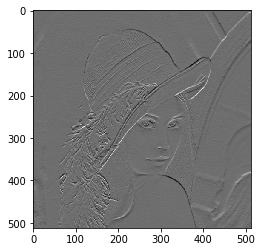

In [75]:
plt.imshow(filtered, cmap = 'gray')

In [76]:
# 최대, 최소 확인
np.min(filtered), np.max(filtered)

(-123.0, 162.0)

In [77]:
cv2.imwrite('Lenna_embossing.png', filtered)

True

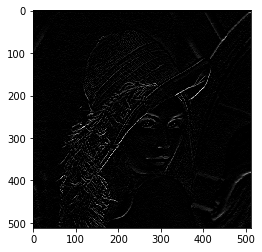

In [79]:
renna_emb = cv2.imread('Lenna_embossing.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(renna_emb, cmap = 'gray')

In [81]:
np.min(renna_emb), np.max(renna_emb)

(0, 162)

### 4.1.1. 정규화 1: 모든 값에 128 더하기
- 경험적인 수치에 의한 정규화, 주먹구구식 방법임

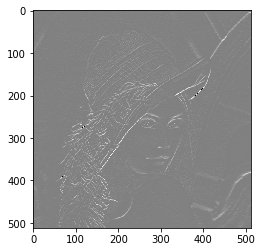

In [63]:
filtered1 = renna_emb + 128
plt.imshow(filtered1, cmap = 'gray')

> 128을 더하는 의미
- 실제 값에서 0인 부분(변화가 없는 부분) : 128로 되면서 회색으로 보임
- 실제 값에서 음수인부분(밝았다 어두워지는 부분): 0이 되면서 검정색으로 보임
- 실제값에서 양수인 부분(어두웠다가 밝아진 부분): 255가 되면서 흰색으로 보임.

### 4.1.2 정규화2: 정규화(0~255)하기

In [66]:
filtered2 = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX).astype('uint')

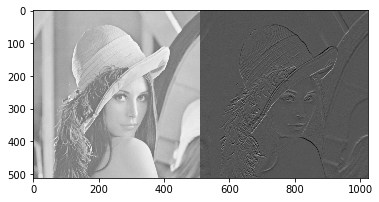

In [67]:
plt.imshow(np.hstack([src, filtered]), cmap = 'gray')

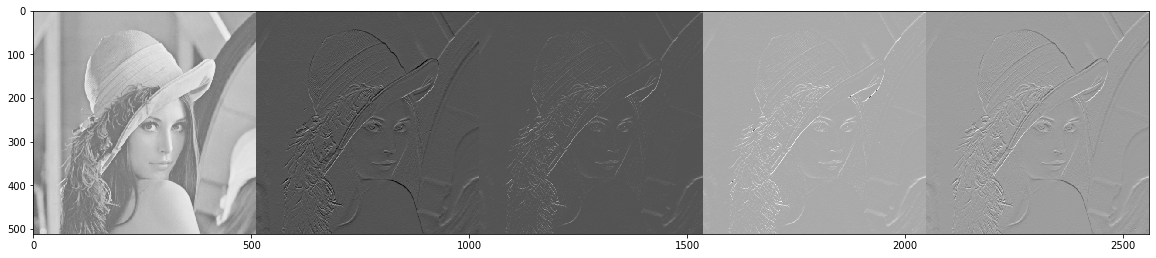

In [70]:
plt.figure(figsize = (20,10))
plt.imshow(np.hstack([src, filtered,renna_emb, filtered1, filtered2]), cmap = 'gray')

# 5. shape에 커널 적용

## 5.1. 이미지를 int16에 적용

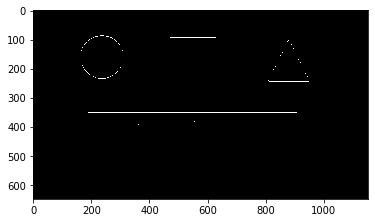

In [85]:
src = cv2.imread('shape.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')

kernel = np.array([[0,1,0],
                  [0,0,0],
                  [0,-1,0]])

filtered = cv2.filter2D(src2, -1, kernel)
filtered

plt.imshow(filtered.astype('uint8'), cmap = 'gray')

- 배경정보가 모두 날아감 (배경: 위픽 셀 값 = 아래픽셀 값)
- 수직 엣지 사라짐
- 수평 엣지는 잘 나타남.

## 5.2. 이미지를 float에 적용

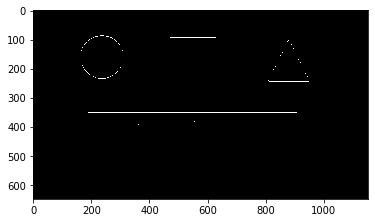

In [90]:
src = cv2.imread('shape.png', cv2.IMREAD_GRAYSCALE)
src2 = src.astype('float')

kernel = np.array([[0,1,0],
                  [0,0,0],
                  [0,-1,0]])

filtered = cv2.filter2D(src2, -1, kernel)
filtered

plt.imshow(filtered.astype('uint8'), cmap = 'gray')

# edge detection 사용
- 반도체 장비 검사
- 자율주행자동차: 라인 detection(차도)

# 6. 엣지 검출
## 6.1. 1차 미분을 이용한 에지 검출

> 미분 이용
- 1차: 미분값이 1개 나옴
- 2차(이미지): 미준값이 2개 나옴.
- x축 미분갑, y축 미분값을 피타고라스 정리로 계산
- 2차원x축, y축 각 방향의 변화율


> 제곱하는 이유
- 두 지점사이의 거기를 구할 때
- 직선거리가 거리 ( x축 이동 거리+ y축 이동 거리)
- 절대값을 취해서 계산하는 것: x축 이동거리 + y축 이동거리의 개념
- 제곱: 직선거리의 개념
- 특정 픽셀에서 미분의 크기는 직선거리로 표현하는 것이 나음.

> 필터 종류
- 소벨, 프리윗, 로버츠

## 6.2. 2차 미분을 이용한 엣지 검출
- 미분을 2번씩 하는 것(미분한 결과를 도 미분함)
- f(x + 1) -2f(x) + f(x-1)로 계산.(미분 2번 안하고)

> 미분을 왜 2번 하나?
- 변화량의 변화를 보겠다는 의미
- 1차 미분값으로 튀는 값을 미분해서 스무딩시키는 효과
- 연결된 폐곡선 형성
- 1차 미분값은 +, -를 통해서 방향성을 알 수 있지만, 2차 미분을 방향을 알 수 없음.

> 1차 미분
- 1차 미분:값이 변화가 있는지를 검출
- 2차 미분: 외곽선인지를 검출가능 (검정-> 흰색, 희색 -> 검정 모두 검축 가능, 선 하나를 봤을 때, 선의 경계 2개를 모두 검출)

> 2차 미분
- 마스크의 합: 모두 1
- 종류: 라플라시안 필터

> 라플라시안 필터
- 크기가 크고 연산량이 많음.


> LOG(라플라시안 of 가우시안)
- 가우시안을 이용해서 노이즈를 없애고 라플라시안 필터 수행.
- 두 개를 한꺼번에 하는 방법: DOG(differnece of 가우시안)

# Xray: 16bit이상 흑백 이미지 사용
- 목적에 따라 bit수를 다르게 사용

# 7. 노이즈 제거
- 노이즈 특성에 따라 가우시안 블러, 미디언 블러 골라서 써야 함.
- 노이즈 제거 후, 엣지 검출 해야함.


## 7.1. 가우시안 블러
- 노이즈: 모두 에지로 나오므로. 노이즈를 제거하기 => 가우시안 블러로 노이즈 제거

In [96]:
img = cv2.imread('brain.jpeg', cv2.IMREAD_GRAYSCALE)

In [101]:
gauss = cv2.GaussianBlur(img, (11,11), 0)

- 블러는 모두 더하면 1이기 때문에, 정규화할 필요 없음

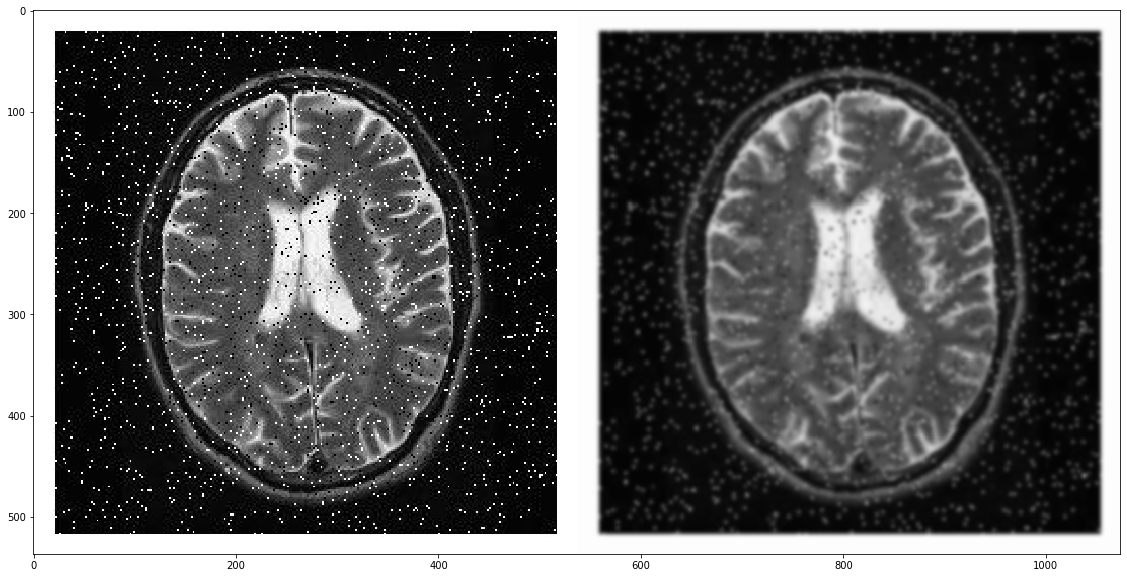

In [102]:
plt.figure(figsize = (20,10))
plt.imshow(np.hstack([img, gauss]), cmap = 'gray')

- 커널을 크게 할수록 노이즈는 사라지지만, 원본 이미지도 같이 흐려짐.

## 7.2. 소벨 필터 적용

In [110]:
# 원본 이미지에 적용
img_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
# 가우시안 블러 이미지에 적용
gau_sobel = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize = 3)

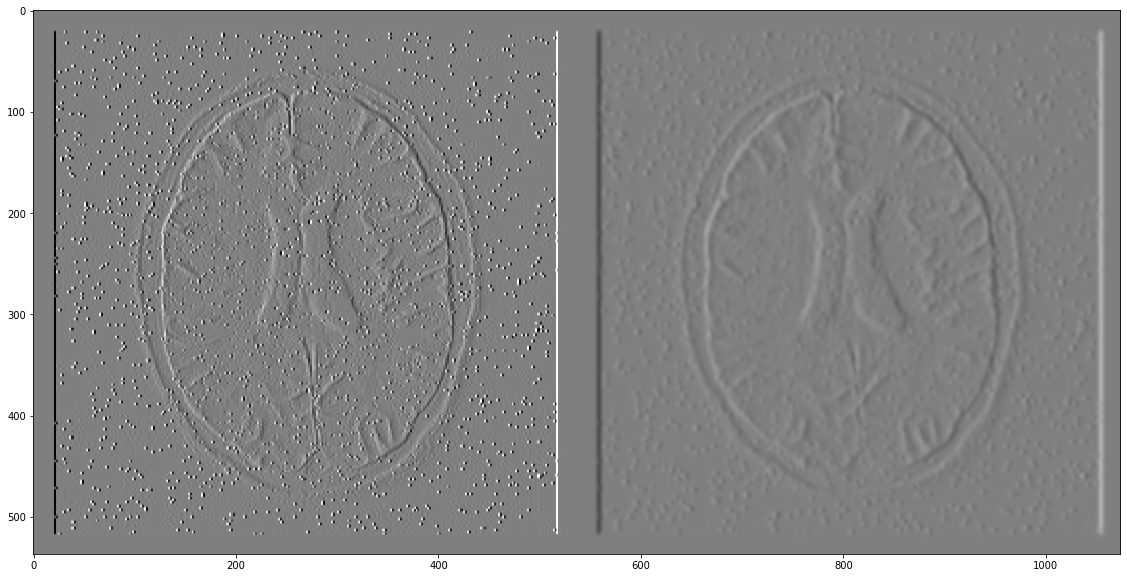

In [109]:
plt.figure(figsize = (20,10))

plt.imshow(np.hstack([img_sobel, gau_sobel]), cmap = 'gray')

## 7.3. median 
- 가우시안: 잡음(고주파 성분)을 무뎌지게 만들지만
- 중앙값: 이상치에 대해 덜 예민함 -> 원래 값을 그대로 유지하면서, 이상치만 없애줌.

In [112]:
median = cv2.medianBlur(img, 5)

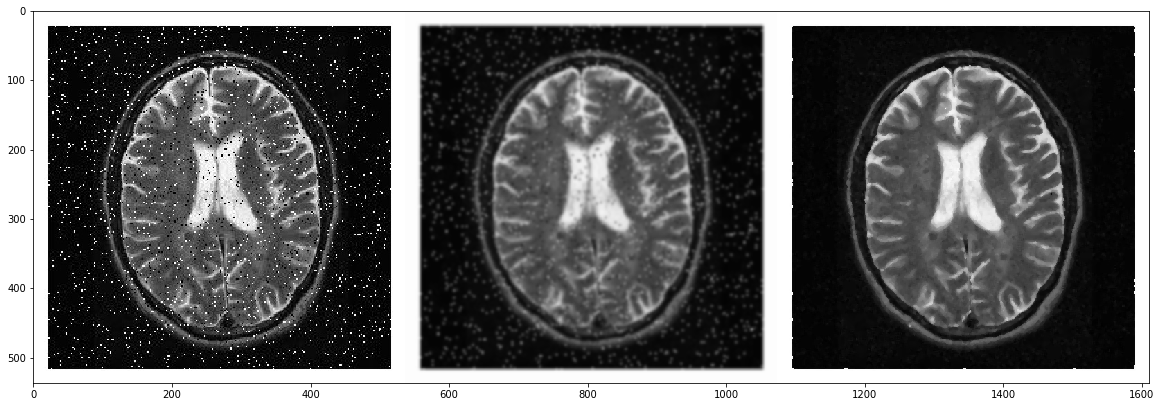

In [115]:
plt.figure(figsize = (20,10))

plt.imshow(np.hstack([img,gauss, median]), cmap = 'gray')